# MadGraph Project

MadGraph was used to simulate 10,000 tttt final state events, with an s-channel Higgs. 

----------------
Syntax for generating the events: 

generate p p > h > t t t~ t~ QED=6 QCD=6,(t > W+ b, W+ > j j),(t > W+ b, W+ > l+ vl),(t~ > w- b~, W- > l- vl~),(t~ > w- b~, W- > j j)

output pp_tttt_h_decay

launch pp_tttt_h_decay

-----------------

Putting the Higgs in p p > h > t t t~ t~ only allows for s-channel Higgs. Without the Higgs, i.e. p p > t t t~ t~, allows for all channels. Unfortunately this generates all sorts of diagrams (g,a,Z in addition to Higgs). It looks like it is impossible to generate just Higgs events that are not only s-channel, due to interference effects. 

Related links: 
https://answers.launchpad.net/mg5amcnlo/+question/226332 interference question 
https://answers.launchpad.net/mg5amcnlo/+question/151032 s-channel higgs question

In [1]:
import pylhe
import ROOT
import math
from pprint import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/04


In [14]:
def calc_pt(px,py):
    '''Calculates transverse momentum'''
    return math.sqrt(px**2+py**2)

def my_hist_plotter(data,x_min,x_max,
                    n_bins,x_axis_name,save,save_name):
    '''Makes basic histogram of data with range specified'''
    fig= plt.figure()
    plt.hist(data,bins=n_bins,range=[x_min, x_max],
             histtype='step',color='tab:blue',fill = True,
             linewidth=0,alpha=0.2, normed = False)
    plt.xlabel(x_axis_name)
    plt.ylabel("Events")
    if save:
        plt.savefig(save_name+".pdf",transparent=True)
    
def my_hist_plotter2(data,n_bins,x_axis_name,save,save_name):
    '''Makes basic histogram of data without range specified'''
    fig= plt.figure()
    plt.hist(data,bins=n_bins,histtype='step',
             color='tab:blue',fill = True,
             linewidth=0,alpha=0.2, normed = False)
    plt.xlabel(x_axis_name)
    plt.ylabel("Events")
    if save:
        plt.savefig(save_name+".pdf",transparent=True)

# name='/Users/jannicke/Applications/MG5_aMC_v2_6_1/pptttt_6_6/Events/run_01/unweighted_events.lhe'
name='/Users/jannicke/Applications/MG5_aMC_v2_6_1/pp_tttt_h_decay/Events/run_01/unweighted_events.lhe'
#name = '/Users/jannicke/Applications/MG5_aMC_v2_6_1/pp_tttt_decay/Events/run_01/unweighted_events.lhe'
i = 0

# Things to plot 
n_leptons = []
n_bs = []
n_jets = []
e_pt = []
m_pt = []
j_pt = []
b_pt = []
ht = []
met = []

for e in pylhe.readLHE(name):
    #i +=1
    #pprint(e.__dict__)
    #pprint(e.eventinfo.__dict__)
    #pprint(e.particles[-1].__dict__)
    met_px = 0
    met_py = 0
    ht_v = 0
    n_bs_v = 0 
    n_leptons_v = 0
    n_jets_v = 0
    for p in e.particles:
        pt = calc_pt(p.px, p.py)
        if p.status == 1.0: # is a final state particle 
            if (p.id != 12 and p.id != 14 and p.id != 16): # not a neutrino
                ht_v += pt # ht is total transverse momentum
                met_px += p.px
                met_py += p.py
            if (abs(p.id) == 5): # is a b
                b_pt.append(pt)
                n_bs_v += 1
            if (abs(p.id) == 11): # is an e
                e_pt.append(pt)
                n_leptons_v += 1
            if (abs(p.id) == 13): # is a mu
                m_pt.append(pt)
                n_leptons_v += 1
            if (abs(p.id) == 15): # is a tau
                print("tau!")
                n_leptons_v += 1
            if (abs(p.id) <7): # is a quark 
                n_jets_v += 1
                j_pt.append(pt)
        #print(p.status,p.id)
    met.append(calc_pt(met_px,met_py))
    ht.append(ht_v)
    n_bs.append(n_bs_v)
    n_leptons.append(n_leptons_v)
    n_jets.append(n_jets_v)
    #print("----")
    #if i == 50:
    #    break

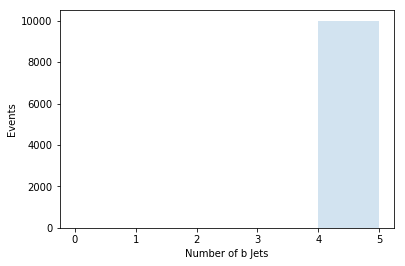

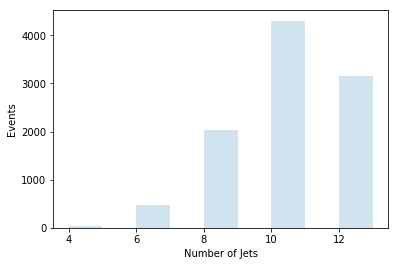

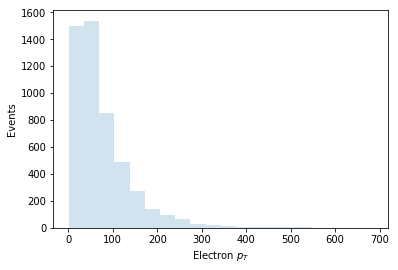

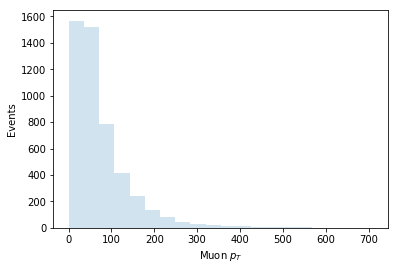

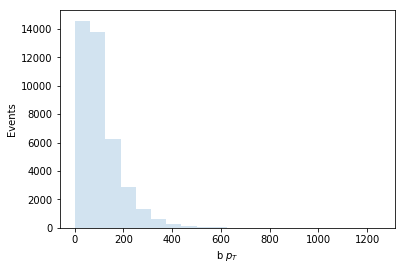

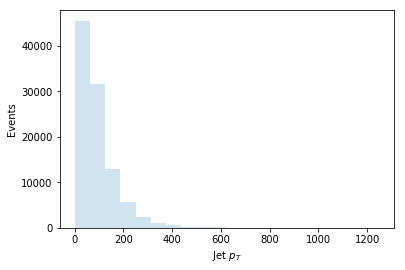

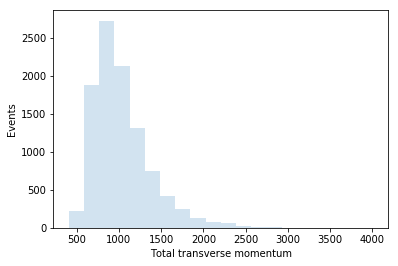

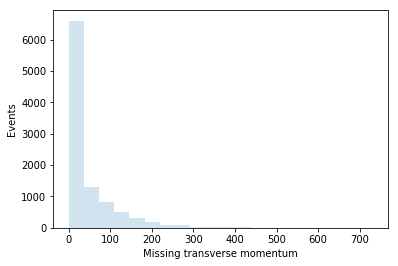

## Number of Leptons

This looks close, but a little off from what we expect


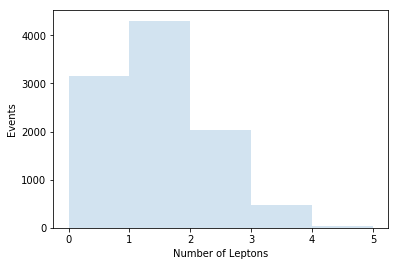

In [15]:
n_bins = 20
save = False
my_hist_plotter(n_leptons,0,5, 5,"Number of Leptons",save,"save_name")


More events with fewer leptons are being populated in our simulation than we expect.

| Number of Leptons in Final State | Expected (%) | Simulated (%)
|----------|----------|----------|
| 0      | 20.9      | 31.5
| 1      | 40.0        | 43.0
| 2      | 28.8      | 20.4
| 3      | 9.1       | 4.7
|4       | 1.2       | 0.3
 

Possible explanations:
- Tau decays are not being simulated (Only muons and electrons appear as leptons in MG)
- Definition of multiparticle l+ = e+ mu+   (from http://www.niu.edu/spmartin/madgraph/madsyntax.html)
- Branching fraction for tau decays is same as other leptons  (https://en.wikipedia.org/wiki/W_and_Z_bosons)

The good news is that the number of leptons is between 0 and 4 as we expect! 

In [16]:
print(np.sum(np.where(np.array(n_leptons) == 0,1,0)))
print(np.sum(np.where(np.array(n_leptons) == 1,1,0)))
print(np.sum(np.where(np.array(n_leptons) == 2,1,0)))
print(np.sum(np.where(np.array(n_leptons) == 3,1,0)))
print(np.sum(np.where(np.array(n_leptons) == 4,1,0)))
3154+4302+2042+471+31

3154
4302
2042
471
31


10000

## Number of b jets

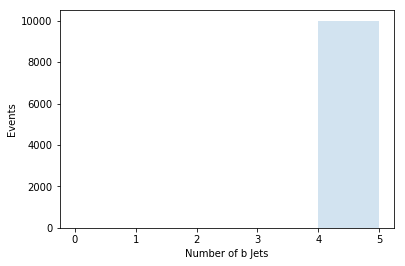

In [17]:
my_hist_plotter(n_bs, 0,5,5,"Number of b Jets",save,"save_name")

This kind of surprised me. We will definitely get 4 b's from the decay of the tops, but I thought that the W would decay into daughter quarks that included a b at some point. Although the b is heavy, it is much lighter than the W. 

Wikipedia states that: The hadronic branching ratio is dominated by the CKM-favored ud~ and cs~ final states. (https://en.wikipedia.org/wiki/W_and_Z_bosons). Cool! I actually never knew this! 

CKM Matrix here https://en.wikipedia.org/wiki/Cabibbo–Kobayashi–Maskawa_matrix

## Number of Jets

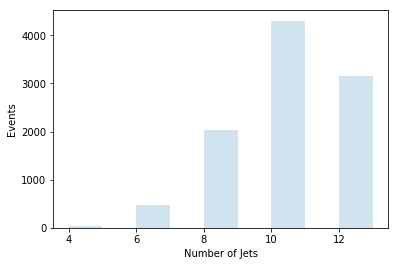

In [18]:
my_hist_plotter(n_jets, 4,13,9,"Number of Jets",save,"save_name")

This looks okay to me, would expect to go from 4 (all leptonic W decays), to 4*3=12 (all hadronic decays). Steps up in factors of two come from the fact that the W either decays into 2 quarks or 0). 

## P_T Plots

These all look pretty fine to me. 

Electron and muon pt distributions look similar as branching fraction is the same, and electron and muon mass are both tiny compared to a W. 

B p_t and jet p_t distributions look similar. B p_t distribution has a median that is slightly higher than that for all jets, due to the fact that the b should be carrying 1/2 of the energy from the top quark on average, whereas other quarks will be carrying 1/4 on average.

Total transverse momentum seems peaked maybe a little lower than I would expect. I think this has to do with the fact that we are only summing momentum in the transverse plane. If we were looking at total momentum I would expect it to be peaked at 6.5/3+6.5/3 = 4.3 TeV. Due to the fact that there are 3 quarks/proton very roughly speaking, but we are looking at only the transverse component, so it would make sense to be smaller. 

MET is not always zero because we have neutrinos! 



83.04446444702589
69.02895021280037


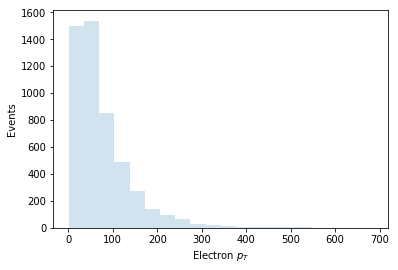

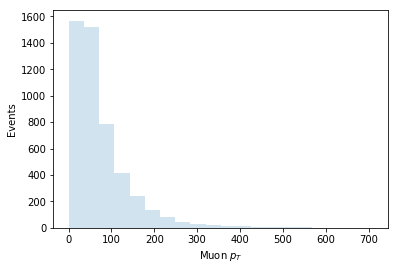

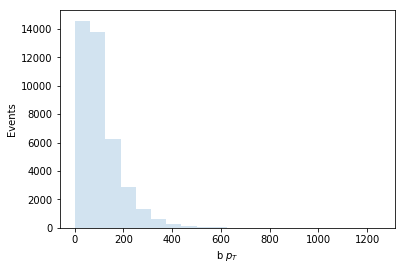

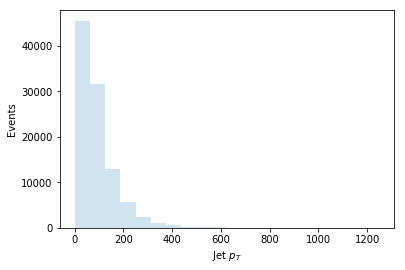

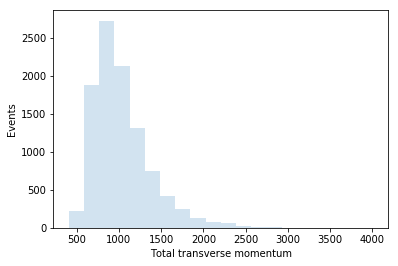

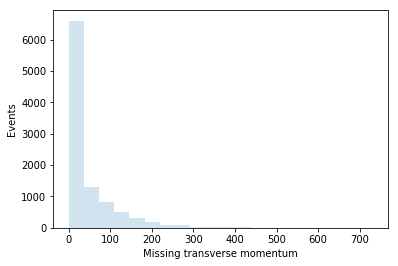

In [19]:
my_hist_plotter2(e_pt, n_bins,r"Electron $p_T$",save,"save_name")
my_hist_plotter2(m_pt, n_bins,r"Muon $p_T$",save,"save_name")
my_hist_plotter2(b_pt, n_bins,r"b $p_T$",save,"save_name")
my_hist_plotter2(j_pt, n_bins,r"Jet $p_T$",save,"save_name")
my_hist_plotter2(ht, n_bins,r"Total transverse momentum",save,"save_name")
my_hist_plotter2(met, n_bins,r"Missing transverse momentum",save,"save_name")
print(np.median(b_pt))
print(np.median(j_pt))
